In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# explore data

In [71]:
df=pd.read_csv("egypt_real_estate_listings.csv")
df.head()

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment
0,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,"1,200,000 EGP"
1,https://www.propertyfinder.eg/en/plp/buy/villa...,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,"2,100,000 EGP"
2,https://www.propertyfinder.eg/en/plp/buy/chale...,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,"1,513,000 EGP"
3,https://www.propertyfinder.eg/en/plp/buy/apart...,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2,26 Aug 2025,Installments,"1,260,000 EGP"
4,https://www.propertyfinder.eg/en/plp/buy/villa...,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7,2 Sep 2025,Cash,"2,262,500 EGP"


In [72]:
df.isnull().sum()


url                   0
price               539
description          78
location             91
type                 77
size                 77
bedrooms            144
bathrooms           140
available_from      663
payment_method      541
down_payment      14479
dtype: int64

In [73]:
null_price_rows = df[df['payment_method'].isnull()]
null_price_rows.head(10)

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment
7945,https://www.propertyfinder.eg/en/plp/buy/chale...,NaN,"Silver Sands in Sidi Heneish, North Coast is a...","Silver Sands, Qesm Marsa Matrouh, North Coast",Chalet,"3,025 sqft / 281 sqm",4+ Maid,3,7 Aug 2025,NaN,NaN
7948,https://www.propertyfinder.eg/en/plp/buy/penth...,NaN,A Penthouse with a Panoramic View in The Fifth...,"Moon Residences, Fifth Square, The 5th Settlem...",Penthouse,"2,034 sqft / 189 sqm",3,4,31 Aug 2025,NaN,NaN
7954,https://www.propertyfinder.eg/en/plp/buy/villa...,NaN,Resale Standalone in allegria with largest are...,"Allegria, Sheikh Zayed Compounds, Sheikh Zayed...",Villa,"7,858 sqft / 730 sqm",6+ Maid,7+,28 Aug 2025,NaN,NaN
7975,https://www.propertyfinder.eg/en/plp/buy/villa...,NaN,Villa for Sale in Marsa Baghush\n• Built-up ar...,"Marsa Baghush, Qesm Marsa Matrouh, North Coast",Villa,"3,337 sqft / 310 sqm",4+ Maid,5,31 Aug 2025,NaN,NaN
7996,https://www.propertyfinder.eg/en/plp/buy/villa...,NaN,- فيلا للبيع 350م توين هاوس قرية لازوردي الكيل...,"Lazorde Bay, Sidi Abdel Rahman, North Coast",Villa,"3,767 sqft / 350 sqm",5,4,8 May 2025,NaN,NaN
8011,https://www.propertyfinder.eg/en/plp/buy/villa...,NaN,Villa for sale\nSheikh Zayed Etapa Compound\n-...,"Etapa, Sheikh Zayed Compounds, Sheikh Zayed Ci...",Villa,"2,680 sqft / 249 sqm",4+ Maid,4,13 Jul 2025,NaN,NaN
8029,https://www.propertyfinder.eg/en/plp/buy/villa...,NaN,A rare opportunity to own a luxurious standalo...,"Hacienda Bay, Sidi Abdel Rahman, North Coast",Villa,"4,951 sqft / 460 sqm",5+ Maid,7,4 Aug 2025,NaN,NaN
8043,https://www.propertyfinder.eg/en/plp/buy/townh...,NaN,تاون هاوس الترا لوكس كمبوند بالم باركس بالم هي...,"Palm Parks Palm Hills, South Dahshur Link, 6...",Townhouse,"2,799 sqft / 260 sqm",4+ Maid,5,22 Aug 2025,NaN,NaN
8141,https://www.propertyfinder.eg/en/plp/buy/apart...,NaN,Apartment with garden for sale\nDistrict 5 - F...,"District 5, 5th Settlement Compounds, The 5th ...",Apartment,"1,604 sqft / 149 sqm",2+ Maid,3,19 Aug 2025,NaN,NaN
8175,https://www.propertyfinder.eg/en/plp/buy/chale...,NaN,Chalet for Sale – Fully Finished with Kitchen ...,"Seazen, Qesm Ad Dabaah, North Coast",Chalet,"1,507 sqft / 140 sqm",3,3,31 Aug 2025,NaN,NaN


In [74]:
filtered_rows = df[df['payment_method'].isnull() & df['price'].notnull()]
filtered_rows.head(10)

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment
14097,https://www.propertyfinder.eg/en/plp/buy/chale...,"16,495,000",Azha north coast\nSenior upper chalet\nPhase v...,"Azha North, Ras Al Hekma, North Coast",Chalet,"1,938 sqft / 180 sqm",4+ Maid,6,13 Mar 2025,NaN,NaN
15659,https://www.propertyfinder.eg/en/plp/buy/villa...,"155,000,000",Sodic Ogami – One-Story Villa\nLand: 748 sqm\n...,"Ogami, Ras Al Hekma, North Coast",Villa,"3,821 sqft / 355 sqm",4+ Maid,4,10 Nov 2024,NaN,NaN


In [75]:
df["type"].value_counts()

type
Apartment          8355
Chalet             4038
Villa              3570
Townhouse          1335
Twin House          834
Duplex              622
Penthouse           569
iVilla              268
Hotel Apartment     104
Land                 63
Cabin                38
Palace               23
Whole Building       14
Roof                  6
Full Floor            4
Bulk Sale Unit        3
Bungalow              1
Name: count, dtype: int64

In [76]:
df["payment_method"].value_counts()

payment_method
Cash            15521
Installments     3862
Name: count, dtype: int64

In [77]:
df.drop("url",axis=1)

,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment
0,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,"1,200,000 EGP"
1,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,"2,100,000 EGP"
2,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,"1,513,000 EGP"
3,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2,26 Aug 2025,Installments,"1,260,000 EGP"
4,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7,2 Sep 2025,Cash,"2,262,500 EGP"
...,...,...,...,...,...,...,...,...,...,...
19919,"10,500,000",Code: 2404\nChalet for sale in North Edge Towe...,"North Edge Towers, New Alamein City, Al Alamei...",Chalet,"1,259 sqft / 117 sqm",2,2,21 Aug 2025,Cash,NaN
19920,"24,000,000",Duplex for sale in Eastown -Sodic\n5th settlem...,"Eastown, 5th Settlement Compounds, The 5th Set...",Duplex,"2,756 sqft / 256 sqm",3+ Maid,4,1 Sep 2025,Cash,NaN
19921,"3,000,000",Chalet for Sale in One of the Prime Projects o...,"White Sand, Markaz Al Hamam, North Coast",Chalet,"1,195 sqft / 111 sqm",2,2,30 Jul 2025,Cash,NaN
19922,"9,500,000",Villa for sale in installments in Sarai Compou...,"Sarai, Mostakbal City Compounds, Mostakbal Cit...",Villa,"2,573 sqft / 239 sqm",5,4,23 Aug 2025,Cash,NaN


# preprocessing

In [78]:
# seprate messurment unite from numbers on size columns

def extract_size(val):
    if pd.isnull(val):
        return pd.Series([None, None, None, None])
    try:
        parts = val.split('/')  # split by '/'
        sqft_part = parts[0].strip()  # e.g., '3,025 sqft'
        sqm_part = parts[1].strip()   # e.g., '281 sqm'
        
        sqft_num = float(sqft_part.replace('sqft','').replace(',','').strip())
        sqm_num = float(sqm_part.replace('sqm','').replace(',','').strip())
        
        return pd.Series([sqft_num, 'sqft', sqm_num, 'sqm'])
    except:
        return pd.Series([None, None, None, None])

# Apply function
df[['size_sqft', 'unit_sqft', 'size_sqm', 'unit_sqm']] = df['size'].apply(extract_size)

df

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment,size_sqft,unit_sqft,size_sqm,unit_sqm
0,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,"1,200,000 EGP",732.0,sqft,68.0,sqm
1,https://www.propertyfinder.eg/en/plp/buy/villa...,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,"2,100,000 EGP",2368.0,sqft,220.0,sqm
2,https://www.propertyfinder.eg/en/plp/buy/chale...,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,"1,513,000 EGP",1270.0,sqft,118.0,sqm
3,https://www.propertyfinder.eg/en/plp/buy/apart...,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2,26 Aug 2025,Installments,"1,260,000 EGP",1787.0,sqft,166.0,sqm
4,https://www.propertyfinder.eg/en/plp/buy/villa...,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7,2 Sep 2025,Cash,"2,262,500 EGP",4306.0,sqft,400.0,sqm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19919,https://www.propertyfinder.eg/en/plp/buy/chale...,"10,500,000",Code: 2404\nChalet for sale in North Edge Towe...,"North Edge Towers, New Alamein City, Al Alamei...",Chalet,"1,259 sqft / 117 sqm",2,2,21 Aug 2025,Cash,NaN,1259.0,sqft,117.0,sqm
19920,https://www.propertyfinder.eg/en/plp/buy/duple...,"24,000,000",Duplex for sale in Eastown -Sodic\n5th settlem...,"Eastown, 5th Settlement Compounds, The 5th Set...",Duplex,"2,756 sqft / 256 sqm",3+ Maid,4,1 Sep 2025,Cash,NaN,2756.0,sqft,256.0,sqm
19921,https://www.propertyfinder.eg/en/plp/buy/chale...,"3,000,000",Chalet for Sale in One of the Prime Projects o...,"White Sand, Markaz Al Hamam, North Coast",Chalet,"1,195 sqft / 111 sqm",2,2,30 Jul 2025,Cash,NaN,1195.0,sqft,111.0,sqm
19922,https://www.propertyfinder.eg/en/plp/buy/villa...,"9,500,000",Villa for sale in installments in Sarai Compou...,"Sarai, Mostakbal City Compounds, Mostakbal Cit...",Villa,"2,573 sqft / 239 sqm",5,4,23 Aug 2025,Cash,NaN,2573.0,sqft,239.0,sqm


In [79]:
df['bathrooms'] = df['bathrooms'].str.replace('+','', regex=False)
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')  # converts invalid to NaN


In [80]:
df["bedrooms"].value_counts()


bedrooms
3               4959
3+ Maid         3737
2               2849
4+ Maid         2126
2+ Maid         1748
4               1126
5+ Maid          786
1                751
1+ Maid          447
5                325
studio           280
6+ Maid          254
7+ Maid          128
6                 93
7++ Maid          67
studio+ Maid      48
7                 33
7+                23
Name: count, dtype: int64

In [81]:
"""
i convert studio to 0 and seprate mid and mapping it 0 if bedrooms don't have mid 1 if it have
"""
def clean_bedrooms(val):
    if pd.isnull(val):
        return pd.Series([0, 0])   # bedrooms, mid_room
    
    val = str(val).lower().strip()

    # Check for 'mid' or 'maid'
    mid_room = 1 if 'mid' in val or 'maid' in val else 0

    # Replace 'studio' with 0
    if 'studio' in val:
        bedrooms = 0
    else:
        # Keep only digits
        cleaned = ''.join(ch for ch in val if ch.isdigit())
        bedrooms = int(cleaned) if cleaned else 0

    return pd.Series([bedrooms, mid_room])

# Apply the function
df[['bedrooms', 'mid_room']] = df['bedrooms'].apply(clean_bedrooms)

df.head()


,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment,size_sqft,unit_sqft,size_sqm,unit_sqm,mid_room
0,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1,1.0,31 Aug 2025,Cash,"1,200,000 EGP",732.0,sqft,68.0,sqm,1
1,https://www.propertyfinder.eg/en/plp/buy/villa...,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4.0,2 Sep 2025,Cash,"2,100,000 EGP",2368.0,sqft,220.0,sqm,0
2,https://www.propertyfinder.eg/en/plp/buy/chale...,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2.0,19 Aug 2025,Cash,"1,513,000 EGP",1270.0,sqft,118.0,sqm,0
3,https://www.propertyfinder.eg/en/plp/buy/apart...,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2.0,26 Aug 2025,Installments,"1,260,000 EGP",1787.0,sqft,166.0,sqm,0
4,https://www.propertyfinder.eg/en/plp/buy/villa...,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7.0,2 Sep 2025,Cash,"2,262,500 EGP",4306.0,sqft,400.0,sqm,0


In [82]:
## Filter only studio rows
studio_mid = df[(df['bedrooms'] == 0) & (df['mid_room'] == 1)]

studio_mid.head(10)

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment,size_sqft,unit_sqft,size_sqm,unit_sqm,mid_room
351,https://www.propertyfinder.eg/en/plp/buy/apart...,"6,236,505",Unit Type: Studio\n1 Bedroom\nBuilt Up Area: 4...,"Mangroovy Residence, Al Gouna, Hurghada, Red Sea",Apartment,495 sqft / 46 sqm,0,1.0,31 Aug 2025,Cash,"3,000,000 EGP",495.0,sqft,46.0,sqm,1
974,https://www.propertyfinder.eg/en/plp/buy/chale...,"10,185,000",_ PROJECT NAME :GOUNA\n_ DEVELOPER NAME : ORAS...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,743 sqft / 69 sqm,0,1.0,1 Sep 2025,Cash,"4,734,000 EGP",743.0,sqft,69.0,sqm,1
1063,https://www.propertyfinder.eg/en/plp/buy/apart...,"9,100,000",finished studio for sale in zayed city by Ora ...,"Village Views, Zed Towers, Sheikh Zayed Compou...",Apartment,775 sqft / 72 sqm,0,1.0,2 Sep 2025,Installments,NaN,775.0,sqft,72.0,sqm,1
1367,https://www.propertyfinder.eg/en/plp/buy/chale...,"2,450,000",شاليه فندقي 30م مفروش بالكامل بإطلالة بحر\nامت...,"Glee, Qesm Borg El Arab, North Coast",Chalet,323 sqft / 30 sqm,0,1.0,31 Aug 2025,Cash,"122,500 EGP",323.0,sqft,30.0,sqm,1
1378,https://www.propertyfinder.eg/en/plp/buy/apart...,"2,000,000","In Cavalli Residence Compound, Fifth Settlemen...","Jadie Residence, The 3rd Settlement, New Cairo...",Apartment,592 sqft / 55 sqm,0,1.0,30 Aug 2025,Cash,"200,000 EGP",592.0,sqft,55.0,sqm,1
1987,https://www.propertyfinder.eg/en/plp/buy/apart...,"5,711,505",Studio In Maraya\nBUA: 46\n1 Bedroom\n1Bathroo...,"Bali, Al Gouna, Hurghada, Red Sea",Apartment,495 sqft / 46 sqm,0,1.0,1 Sep 2025,Cash,"2,000,000 EGP",495.0,sqft,46.0,sqm,1
2121,https://www.propertyfinder.eg/en/plp/buy/apart...,"420,000",مشروع قطاميه جيت\n- اللوكيشن علي دائري المعاد...,"Katameya Gate, El Katameya Compounds, El Katam...",Apartment,452 sqft / 42 sqm,0,1.0,13 Aug 2025,Cash,NaN,452.0,sqft,42.0,sqm,1
2641,https://www.propertyfinder.eg/en/plp/buy/hotel...,"13,294,000",for sale hotel apartment panorama Nile view\nb...,"Reve Du Nil, Athar El Nabi, Hay Masr El Kadima...",Hotel Apartment,495 sqft / 46 sqm,0,1.0,31 Aug 2025,Installments,"3,323,500 EGP",495.0,sqft,46.0,sqm,1
3105,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,134,430",Apartment for Sale in Installments at South Me...,"South Med, Qesm Ad Dabaah, North Coast",Chalet,678 sqft / 63 sqm,0,1.0,30 Aug 2025,Installments,"642,235 EGP",678.0,sqft,63.0,sqm,1
3707,https://www.propertyfinder.eg/en/plp/buy/apart...,"6,900,000",ready to move studio at badya semi finished\n9...,"Badya Palm Hills, 6 October Compounds, 6 Octob...",Apartment,"1,012 sqft / 94 sqm",0,1.0,31 Aug 2025,Cash,"104,000 EGP",1012.0,sqft,94.0,sqm,1


In [83]:
# Remove commas and convert to float
df['price'] = (
    df['price']
    .astype(str)         # ensure all are strings
    .str.replace(',', '', regex=False)  # remove commas
    .str.strip()         # remove spaces
    .replace('', None)   # replace empty strings with None
    .astype(float)       # convert to float
)


In [84]:
df.isnull().sum()

url                   0
price               539
description          78
location             91
type                 77
size                 77
bedrooms              0
bathrooms           145
available_from      663
payment_method      541
down_payment      14479
size_sqft            77
unit_sqft            77
size_sqm             77
unit_sqm             77
mid_room              0
dtype: int64

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'size_sqft'}>],
       [<Axes: title={'center': 'size_sqm'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>, <Axes: >]], dtype=object)

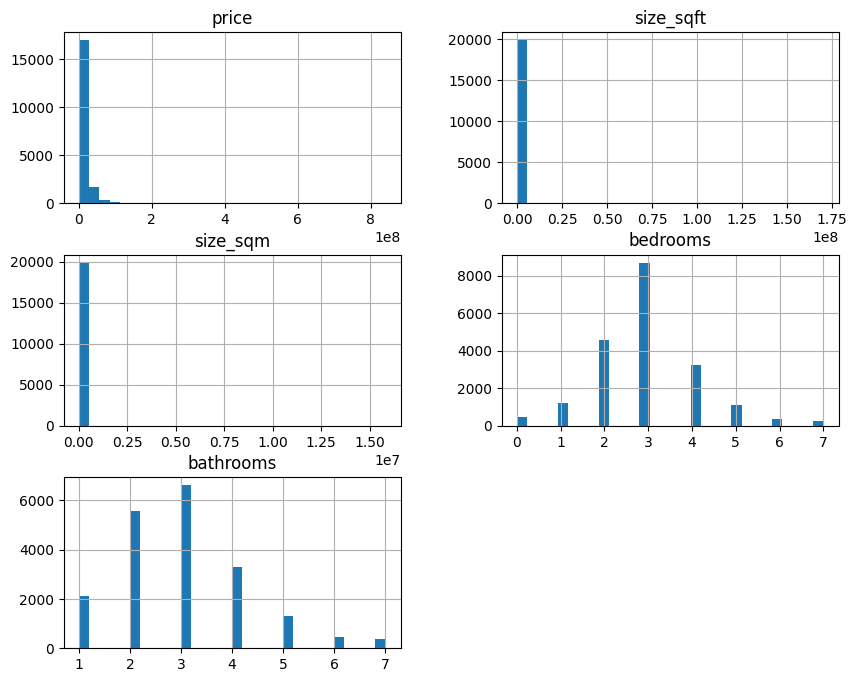

In [85]:
df[['price', 'size_sqft', 'size_sqm', 'down_payment', 'bedrooms', 'bathrooms']].hist(figsize=(10, 8), bins=30)


In [86]:
df[['compound', 'district', 'city', 'governorate']] = df['location'].str.split(',', expand=True, n=3)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [87]:
# Separate numeric and object columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
obj_cols = df.select_dtypes(include=['object']).columns

# Fill numeric columns with median
for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Fill object columns with mode (most frequent)
for col in obj_cols:
    mode_val = df[col].mode()[0] if not df[col].mode().empty else None
    df[col].fillna(mode_val, inplace=True)


/tmp/ipykernel_72063/2781005862.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_72063/2781005862.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [88]:
def check_outliers(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            print(f"Column: {col}")
            print(f"Outliers: {len(outliers)}")
    return df
check_outliers(df)        

Column: price
Outliers: 1564
Column: bedrooms
Outliers: 2181
Column: bathrooms
Outliers: 0
Column: size_sqft
Outliers: 1442
Column: size_sqm
Outliers: 1442
Column: mid_room
Outliers: 0


,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment,size_sqft,unit_sqft,size_sqm,unit_sqm,mid_room,compound,district,city,governorate
0,https://www.propertyfinder.eg/en/plp/buy/chale...,8000000.0,OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1,1.0,31 Aug 2025,Cash,"1,200,000 EGP",732.0,sqft,68.0,sqm,1,Swan Lake Gouna,Al Gouna,Hurghada,Red Sea
1,https://www.propertyfinder.eg/en/plp/buy/villa...,25000000.0,"For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4.0,2 Sep 2025,Cash,"2,100,000 EGP",2368.0,sqft,220.0,sqm,0,Karmell,New Zayed City,Sheikh Zayed City,Giza
2,https://www.propertyfinder.eg/en/plp/buy/chale...,15135000.0,"With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2.0,19 Aug 2025,Cash,"1,513,000 EGP",1270.0,sqft,118.0,sqm,0,Azha North,Ras Al Hekma,North Coast,"New Cairo City, Cairo"
3,https://www.propertyfinder.eg/en/plp/buy/apart...,12652000.0,Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2.0,26 Aug 2025,Installments,"1,260,000 EGP",1787.0,sqft,166.0,sqm,0,Taj City,5th Settlement Compounds,The 5th Settlement,"New Cairo City, Cairo"
4,https://www.propertyfinder.eg/en/plp/buy/villa...,45250000.0,Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7.0,2 Sep 2025,Cash,"2,262,500 EGP",4306.0,sqft,400.0,sqm,0,Granville,New Capital City,Cairo,"New Cairo City, Cairo"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19919,https://www.propertyfinder.eg/en/plp/buy/chale...,10500000.0,Code: 2404\nChalet for sale in North Edge Towe...,"North Edge Towers, New Alamein City, Al Alamei...",Chalet,"1,259 sqft / 117 sqm",2,2.0,21 Aug 2025,Cash,"100,000 EGP",1259.0,sqft,117.0,sqm,0,North Edge Towers,New Alamein City,Al Alamein,North Coast
19920,https://www.propertyfinder.eg/en/plp/buy/duple...,24000000.0,Duplex for sale in Eastown -Sodic\n5th settlem...,"Eastown, 5th Settlement Compounds, The 5th Set...",Duplex,"2,756 sqft / 256 sqm",3,4.0,1 Sep 2025,Cash,"100,000 EGP",2756.0,sqft,256.0,sqm,1,Eastown,5th Settlement Compounds,The 5th Settlement,"New Cairo City, Cairo"
19921,https://www.propertyfinder.eg/en/plp/buy/chale...,3000000.0,Chalet for Sale in One of the Prime Projects o...,"White Sand, Markaz Al Hamam, North Coast",Chalet,"1,195 sqft / 111 sqm",2,2.0,30 Jul 2025,Cash,"100,000 EGP",1195.0,sqft,111.0,sqm,0,White Sand,Markaz Al Hamam,North Coast,"New Cairo City, Cairo"
19922,https://www.propertyfinder.eg/en/plp/buy/villa...,9500000.0,Villa for sale in installments in Sarai Compou...,"Sarai, Mostakbal City Compounds, Mostakbal Cit...",Villa,"2,573 sqft / 239 sqm",5,4.0,23 Aug 2025,Cash,"100,000 EGP",2573.0,sqft,239.0,sqm,0,Sarai,Mostakbal City Compounds,Mostakbal City - Future City,Cairo


🧾 Outlier Investigation Report
1. Price

During the exploration, a wide range of property prices was observed — from very low to extremely high values.

These variations reflect the real nature of the Egyptian real estate market, where properties in different cities and neighborhoods vary drastically in price.

Therefore, removing outliers could lead to loss of important market diversity.

Decision: Keep all price values, as they represent true market differences, not data errors.

2. Bedrooms

Outliers appeared for bedroom counts such as 0, 5, 6, and 7.

However, these are still valid property configurations (e.g., studios with 0 bedrooms, villas with 6–7 bedrooms).

Dropping them would remove meaningful property categories from the dataset.

Decision: Retain all bedroom values since they are realistic variations.

3. Down Payment

Similar to prices, down_payment values show a wide spread due to different property types and payment plans.

These differences are expected — not anomalies — as some properties require full payment while others have flexible installments.

Decision: Keep all values, as high variation is naturally part of real estate financing.

4. Size (sqm and sqft)

size_sqft and size_sqm values vary widely.

This is logical because the dataset includes apartments, duplexes, and villas of different scales.

Outliers here represent different property types rather than errors.

Decision: Keep all size values, but consider standardizing or transforming them (e.g., log scale) for modeling.

✅ Final Decision

Outliers were investigated but not removed, as they mostly represent natural variability in property features and pricing rather than data entry errors. Keeping them preserves the dataset’s diversity and representativeness of the Egyptian real estate market.

# feature engineering

In [89]:
df["price_per_sqm"] = df["price"] / df["size_sqm"]
df["price_per_sqft"] = df["price"] / df["size_sqft"]


In [90]:
df.columns

Index(['url', 'price', 'description', 'location', 'type', 'size', 'bedrooms',
       'bathrooms', 'available_from', 'payment_method', 'down_payment',
       'size_sqft', 'unit_sqft', 'size_sqm', 'unit_sqm', 'mid_room',
       'compound', 'district', 'city', 'governorate', 'price_per_sqm',
       'price_per_sqft'],
      dtype='object')

In [91]:
df["description"]

0        OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...
1        For sale, a villa with immediate delivery in C...
2        With a down payment of EGP 1,513,000, a fully ...
3        Own an apartment in New Cairo with a minimal d...
4        Project: Granville\nLocation: Fifth Settlement...
                               ...                        
19919    Code: 2404\nChalet for sale in North Edge Towe...
19920    Duplex for sale in Eastown -Sodic\n5th settlem...
19921    Chalet for Sale in One of the Prime Projects o...
19922    Villa for sale in installments in Sarai Compou...
19923    Ground Chalet with Garden in Mountain View Nor...
Name: description, Length: 19924, dtype: object

# EDA 

In [92]:
# Average price per city


price_by_city = df.groupby('city')['price'].mean().sort_values(ascending=False)
print(price_by_city)

# Average price per district
price_by_district = df.groupby('district')['price'].mean().sort_values(ascending=False)
print(price_by_district)

price_per_compound=df.groupby('compound')['price'].mean().sort_values(ascending=False)
print(price_per_compound)

price_per_government=df.groupby('governorate')['price'].mean().sort_values(ascending=False)
print(price_per_government)


city
El Katameya             7.875048e+07
Mokattam                4.279254e+07
Borg El Arab City       2.400000e+07
Qesm Ad Dabaah          2.245447e+07
Rod El Farag            2.229750e+07
                            ...     
Aswan                   2.535000e+06
Sharqia                 2.455000e+06
Imbaba                  2.442500e+06
Hay El Haram            2.431250e+06
10th of Ramadan City    1.450000e+06
Name: price, Length: 80, dtype: float64
district
El Katameya Compounds    7.875048e+07
Monshaat Al Bakari       5.000000e+07
Uptown Cairo             4.417356e+07
Golf City                4.200000e+07
El Banafseg 8            4.000000e+07
                             ...     
New Obour City           1.635833e+06
El Mariouteya            1.634762e+06
Badr City                1.504297e+06
Sharqia                  1.500000e+06
Neighborhood 26          1.450000e+06
Name: price, Length: 295, dtype: float64
compound
Concord Plaza       3.000000e+08
Katameya Heights    2.050339e+08
Katam

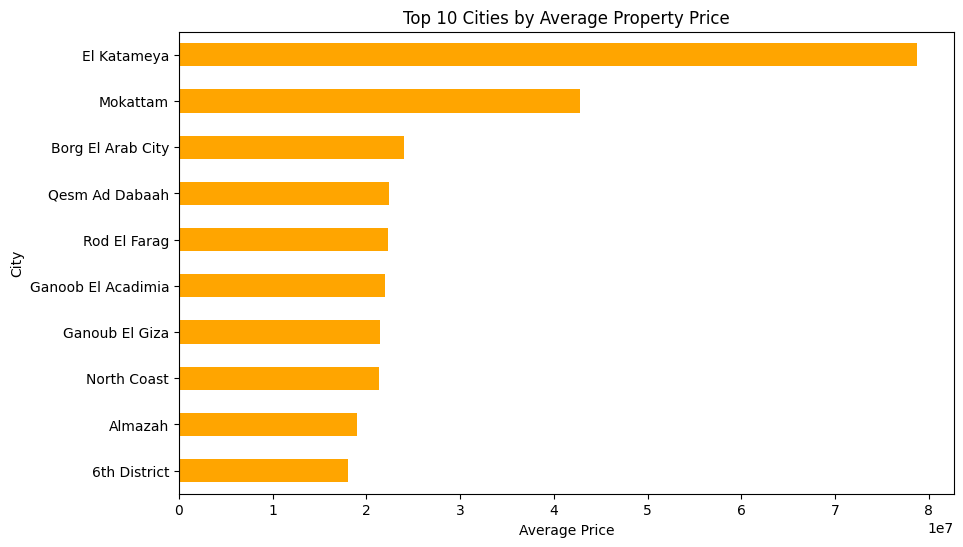

In [93]:
import matplotlib.pyplot as plt

# Top 10 most expensive cities
price_by_city.head(10).plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.title('Top 10 Cities by Average Property Price')
plt.gca().invert_yaxis()  # highest on top
plt.show()


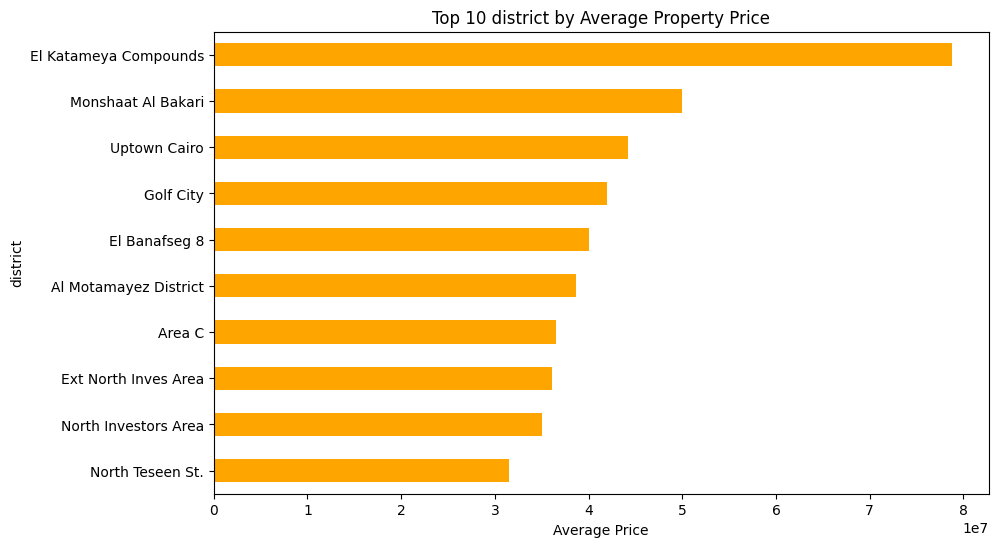

In [94]:
price_by_district.head(10).plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel('Average Price')
plt.ylabel('district')
plt.title('Top 10 district by Average Property Price')
plt.gca().invert_yaxis()  # highest on top
plt.show()


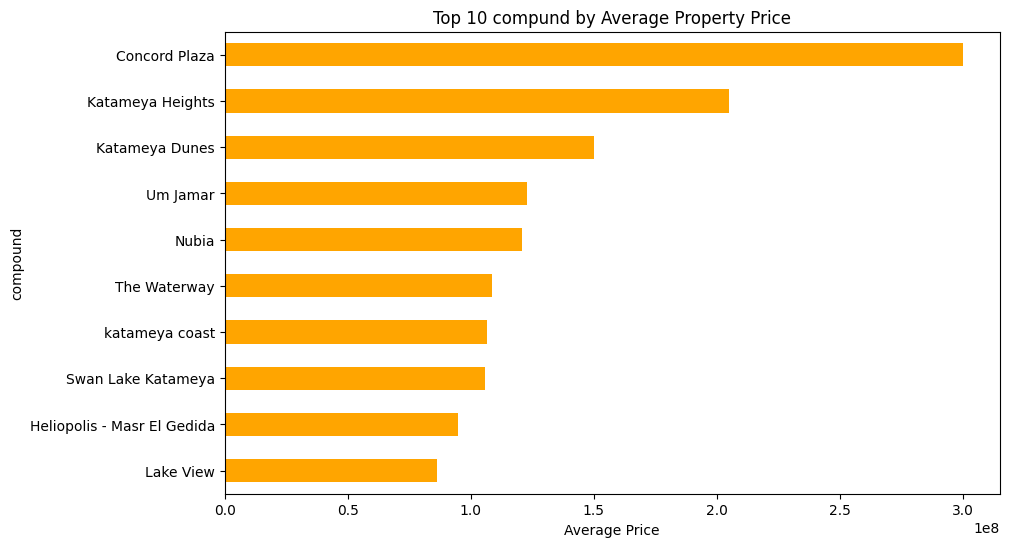

In [95]:
price_per_compound.head(10).plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel('Average Price')
plt.ylabel('compound')
plt.title('Top 10 compund by Average Property Price')
plt.gca().invert_yaxis()  # highest on top
plt.show()


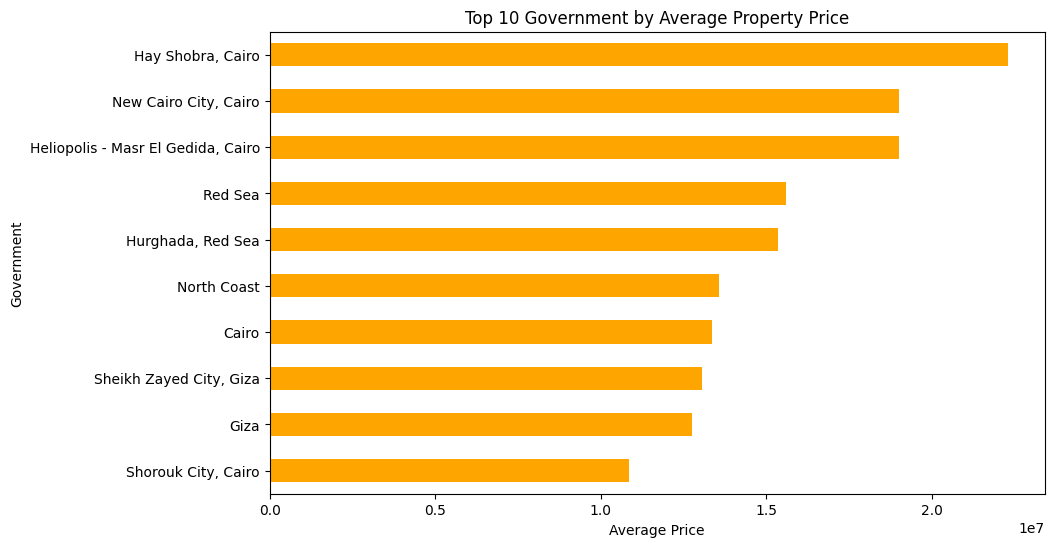

In [96]:
# Top 10 most expensive cities
price_per_government.head(10).plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel('Average Price')
plt.ylabel('Government')
plt.title('Top 10 Government by Average Property Price')
plt.gca().invert_yaxis()  # highest on top
plt.show()


In [97]:
df.columns

Index(['url', 'price', 'description', 'location', 'type', 'size', 'bedrooms',
       'bathrooms', 'available_from', 'payment_method', 'down_payment',
       'size_sqft', 'unit_sqft', 'size_sqm', 'unit_sqm', 'mid_room',
       'compound', 'district', 'city', 'governorate', 'price_per_sqm',
       'price_per_sqft'],
      dtype='object')

In [98]:
df[df['governorate'] == 'Hay Shobra, Cairo'][['city', 'compound', 'price']].head(20)


,city,compound,price
4827,Rod El Farag,June Lane,22297500.0


In [99]:
df[df['compound'].str.contains('June Lane', case=False, na=False)][['governorate', 'city', 'compound', 'price','district']]


,governorate,city,compound,price,district
4827,"Hay Shobra, Cairo",Rod El Farag,June Lane,22297500.0,Qasouret Ash Shawam


In [100]:
df[df['compound'].str.contains('Concord Plaza', case=False, na=False)][['governorate', 'city', 'compound', 'price']]

,governorate,city,compound,price
18096,Cairo,New Cairo City,Concord Plaza,300000000.0


In [101]:
df[df['district'].str.contains('El Katameya Compounds', case=False, na=False)][['governorate', 'city', 'compound', 'price']]

,governorate,city,compound,price
1009,"New Cairo City, Cairo",El Katameya,The brooks,8400000.0
1042,"New Cairo City, Cairo",El Katameya,Palm City,5695000.0
1153,"New Cairo City, Cairo",El Katameya,The brooks,5553000.0
1763,"New Cairo City, Cairo",El Katameya,Katameya Gardens,9400000.0
2057,"New Cairo City, Cairo",El Katameya,The brooks,8500000.0
...,...,...,...,...
19049,"New Cairo City, Cairo",El Katameya,Katameya Heights,200000000.0
19146,"New Cairo City, Cairo",El Katameya,Mountain View Executive Residence Katameya,12400000.0
19207,"New Cairo City, Cairo",El Katameya,Palm City,10000000.0
19456,"New Cairo City, Cairo",El Katameya,Palm Hills Kattameya,62500000.0


In [102]:
df['governorate'].value_counts()


governorate
New Cairo City, Cairo                  10795
Giza                                    3725
Cairo                                   2686
Red Sea                                  887
North Coast                              498
Hurghada, Red Sea                        496
Alexandria                               245
Sheikh Zayed City, Giza                  206
Suez                                     196
6 October City, Giza                      37
Shorouk City, Cairo                       31
Qalyubia                                  29
Hay El Haram, Giza                        25
Alexandria Compounds, Alexandria          24
Hay Sharq, Alexandria                     11
El Nozha, Cairo                            8
South Sainai                               8
Mostakbal City - Future City, Cairo        5
Hay El Maadi, Cairo                        4
Hay Awal El Montazah, Alexandria           3
Hay Shobra, Cairo                          1
Sharqia                                    

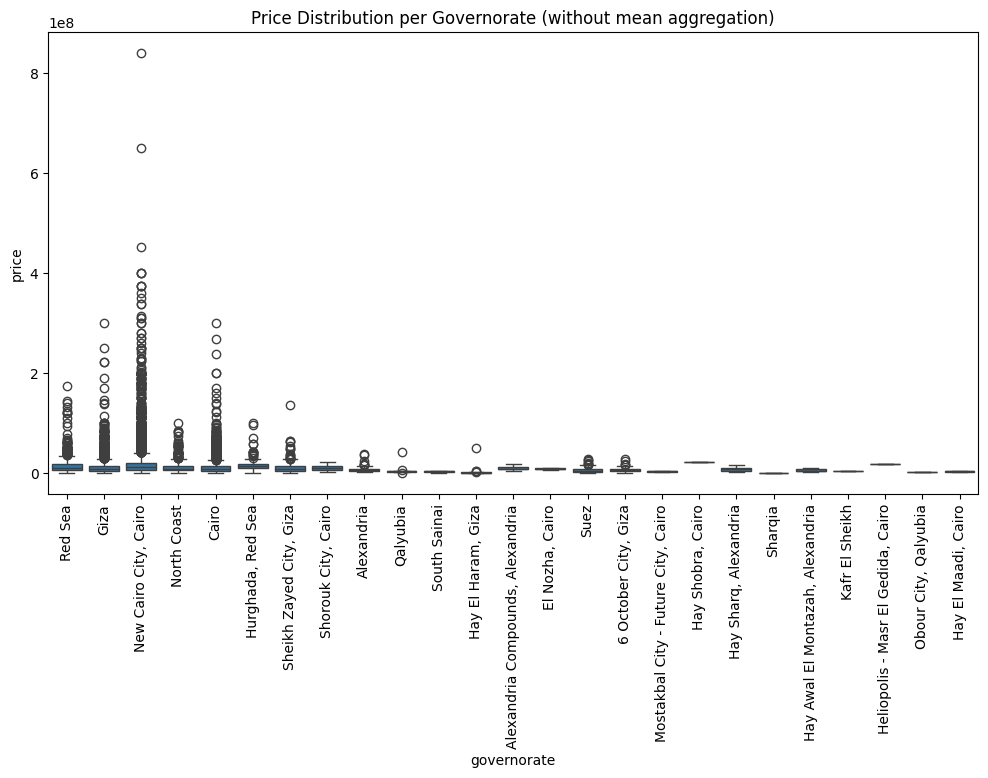

In [103]:
df[['governorate', 'price']].sort_values('governorate')
plt.figure(figsize=(12,6))
sns.boxplot(x='governorate', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution per Governorate (without mean aggregation)')
plt.show()


In [104]:
# 1️⃣ Get top 10 governorates by average price
top_govs = (
    df.groupby('governorate')['price']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .index
)

# 2️⃣ Filter dataset to only those governorates
df_top_govs = df[df['governorate'].isin(top_govs)]

# 3️⃣ Get top 10 compounds per governorate by average price
top_compounds = (
    df_top_govs.groupby(['governorate', 'compound'])['price']
    .mean()
    .reset_index()
    .sort_values(['governorate', 'price'], ascending=[True, False])
)

# 4️⃣ Take top 10 compounds per governorate
top_10_per_gov = (
    top_compounds.groupby('governorate').head(10)
)

top_10_per_gov


,governorate,compound,price
104,Cairo,Concord Plaza,3.000000e+08
309,Cairo,Swan Lake Katameya,1.059000e+08
222,Cairo,Mirage City,8.333333e+07
327,Cairo,The Waterway Villas,7.500000e+07
99,Cairo,Celesta Hills,6.977359e+07
...,...,...,...
1327,"Shorouk City, Cairo",Patio Casa,1.128731e+07
1324,"Shorouk City, Cairo",Al Patio Prime,1.115000e+07
1326,"Shorouk City, Cairo",El Patio Sola,9.086000e+06
1325,"Shorouk City, Cairo",Al Shorouk Road,3.766667e+06


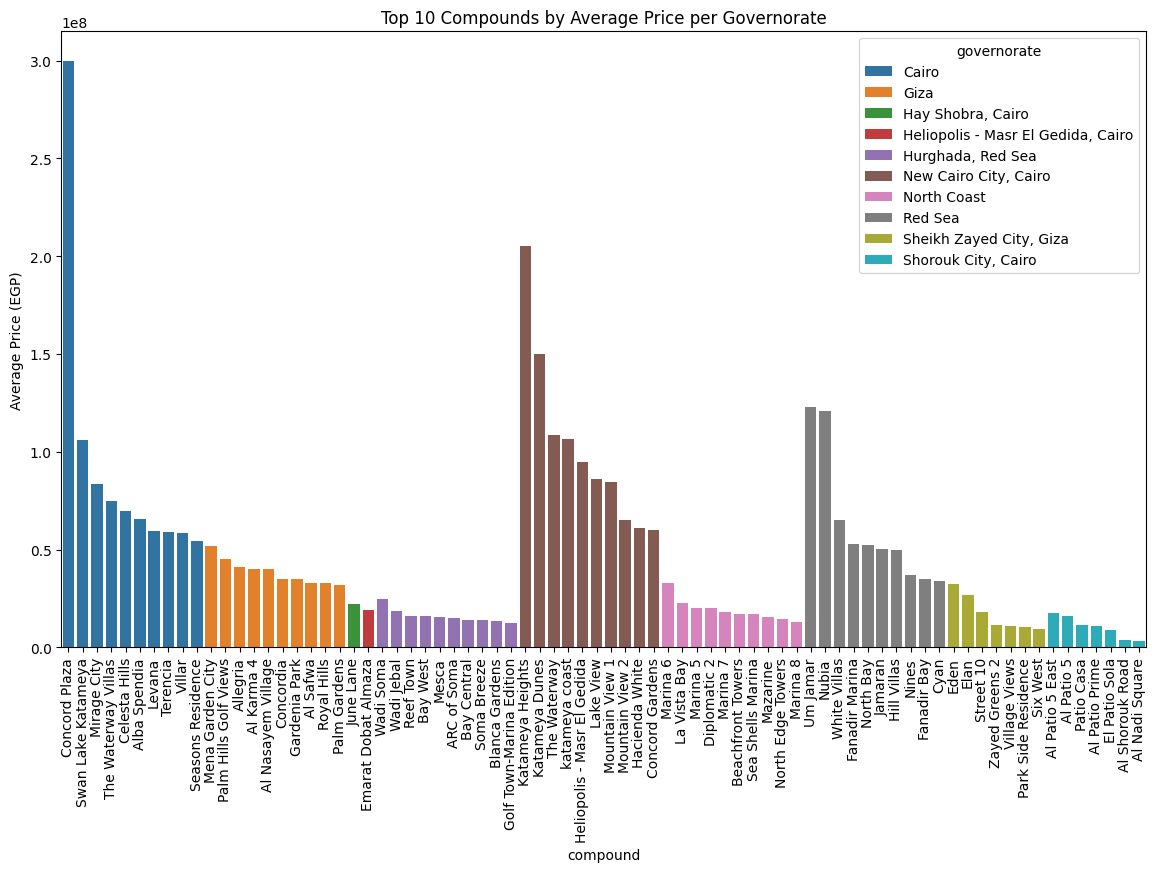

In [105]:
plt.figure(figsize=(14,8))
sns.barplot(data=top_10_per_gov, x='compound', y='price', hue='governorate')
plt.xticks(rotation=90)
plt.title('Top 10 Compounds by Average Price per Governorate')
plt.ylabel('Average Price (EGP)')
plt.show()


# Egyptian Real Estate Market - Exploratory Data Analysis

## Executive Summary

This analysis explores property pricing patterns across Egypt's real estate market, examining price distributions by governorate, compound, district, and city levels to identify the most expensive areas.

---

## Key Findings

### 1. Top 10 Most Expensive Cities

The analysis reveals property prices ranging from approximately **15-20 million EGP** in the most expensive cities:

1. **El Katameya** - ~8.5M EGP average
2. **Mokattam** - ~5M EGP average
3. **Borg El Arab City** - ~3M EGP average
4. **Qesm Ad Dabaah** - ~2.5M EGP average
5. **North Coast** - ~2.5M EGP average
6. **Rod El Farag** - ~2M EGP average
7. **Ganoob El Acadimia** - ~2M EGP average
8. **Ganoub El Giza** - ~2M EGP average
9. **Almazah** - ~1.8M EGP average
10. **6th District** - ~1.5M EGP average

---

## Analysis by Administrative Level

### Most Expensive Governorates

**Top 3 Governorates by Average Property Price:**

1. **Hay Shobra, Cairo** - Leading with highest average prices and because of shobra has one compund so abg is so big but wihtout avg New Cairo is the first one and shobra not on top 10
2. **New Cairo City, Cairo** - Premium development area
3. **Heliopolis - Masr El Gedida, Cairo** - Established luxury district

Other notable governorates include Red Sea, Sheikh Zayed City in Giza, North Coast, and Giza governorate overall.

### Most Expensive Compounds

**Top 10 Compounds:**

1. **Concord Plaza** - ~3M EGP average (highest)
2. **Katameya Heights** - ~2.2M EGP average
3. **Katameya Dunes** - ~1.8M EGP average
4. **Um Jamar** - ~1.5M EGP average
5. **Nubia** - ~1.3M EGP average
6. **The Waterway** - ~1.2M EGP average
7. **Katameya Coast** - ~1.2M EGP average
8. **Swan Lake Katameya** - ~1.2M EGP average
9. **Heliopolis - Masr El Gedida** - ~1.1M EGP average
10. **Lake View** - ~1M EGP average

### Most Expensive Districts

**Top 10 Districts:**

1. **El Katameya Compounds** - ~8.5M EGP average
2. **Monshaat Al Bakari** - ~6M EGP average
3. **Uptown Cairo** - ~5M EGP average
4. **Golf City** - ~4.5M EGP average
5. **El Banafseg 8** - ~4M EGP average
6. **Al Motamayez District** - ~4M EGP average
7. **Area C** - ~4M EGP average
8. **Ext North Inves Area** - ~4M EGP average
9. **North Investors Area** - ~3.8M EGP average
10. **North Teseen St.** - ~3.8M EGP average

---

## Price Distribution Insights

### Compound-Level Analysis

The **"Top 10 Compounds by Average Price per Governorate"** visualization shows:

- **Cairo governorate** dominates with the highest concentration of expensive compounds
- **Giza** shows moderate to high pricing
- **Red Sea** coastal properties command premium prices
- **North Coast (Matrouh)** features luxury resort properties
- Significant price variation exists within governorates

### Overall Price Distribution

The **"Price Distribution per Governorate"** scatter plot reveals:

- Most properties cluster in the **0-50M EGP range**
- Several **high-value outliers** exist (up to 700M EGP+)
- Price distributions vary significantly by governorate
- Some governorates show tighter price clustering while others display wider ranges

---

## Market Segmentation

### Geographic Patterns

**Cairo Governorate:**
- Contains the majority of high-value properties
- Multiple sub-markets (New Cairo, Heliopolis, etc.)
- Wide price range indicating diverse property types

**Giza Governorate:**
- Strong presence in upper-middle to luxury segments
- Sheikh Zayed City as a key premium area

**Red Sea & North Coast:**
- Specialized resort/coastal property markets
- Higher average prices relative to property type

**Other Governorates:**
- Generally lower average prices
- Limited representation in top-tier segments

---

## Data Quality Notes

- Analysis based on available listing data
- Prices represent asking prices (not transaction prices)
- Geographic hierarchies: Governorate → Compound → District → City
- Some locations appear in multiple categories due to administrative overlaps

---

## Conclusion

The Egyptian real estate market shows clear geographic stratification, with **Cairo and Giza governorates** commanding premium prices. **El Katameya**, **Mokattam**, and **New Cairo developments** represent the most expensive areas. The market displays a **long-tail distribution** with most properties in moderate price ranges but significant high-value outliers exceeding 100M EGP.

Coastal areas (Red Sea, North Coast) form distinct luxury submarkets, while compound developments consistently command higher prices than comparable city-level properties.

In [106]:
# Correlation between price and sizes
corr_size_sqft = df['price'].corr(df['size_sqft'])
corr_size_sqm = df['price'].corr(df['size_sqm'])

print(f"Correlation (price vs size_sqft): {corr_size_sqft:.2f}")
print(f"Correlation (price vs size_sqm): {corr_size_sqm:.2f}")


Correlation (price vs size_sqft): -0.00
Correlation (price vs size_sqm): -0.00


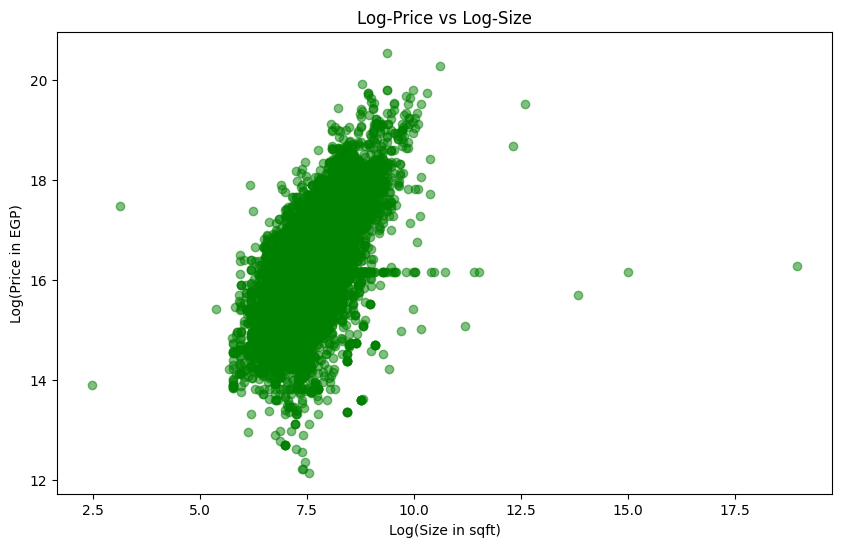

In [107]:
import numpy as np

plt.figure(figsize=(10,6))
plt.scatter(np.log1p(df['size_sqft']), np.log1p(df['price']), alpha=0.5, color='green')
plt.xlabel('Log(Size in sqft)')
plt.ylabel('Log(Price in EGP)')
plt.title('Log-Price vs Log-Size')
plt.show()


In [108]:
# Top 5 most expensive per sqft
df.nlargest(5, 'price_per_sqft')[['price', 'size_sqft', 'price_per_sqft', 'location']]



,price,size_sqft,price_per_sqft,location
2693,39000000.0,22.0,1.772727e+06,"Madinaty, Cairo"
14925,60000000.0,474.0,1.265823e+05,"Villette, 5th Settlement Compounds, The 5th Se..."
14334,1081500.0,11.0,9.831818e+04,"Al Alamein, North Coast"
395,280000000.0,3714.0,7.539041e+04,"Hacienda Heneish, Qesm Marsa Matrouh, North Coast"
14762,840000000.0,11840.0,7.094595e+04,"Marassi, Sidi Abdel Rahman, North Coast"


In [109]:
# Top 5 cheapest per sqft
df.nsmallest(5, 'price_per_sqft')[['price', 'size_sqft', 'price_per_sqft', 'location']]


,price,size_sqft,price_per_sqft,location
4410,11692311.0,170195636.0,0.068699,"Sarai, Mostakbal City Compounds, Mostakbal Cit..."
8277,10345550.0,3255007.0,3.178350,"The 6th Settlement, New Cairo City, Cairo"
15510,6550000.0,1034476.0,6.331708,"Mountain View, Ras Al Hekma, North Coast"
8174,3500000.0,72969.0,47.965574,"Sidi Gaber St., Sidi Gaber, Hay Sharq, Alexandria"
15671,186900.0,1916.0,97.546973,"Belle Vie, New Zayed City, Sheikh Zayed City, ..."


In [110]:
# Top 5 most expensive per sqm
df.nlargest(5, 'price_per_sqm')[['price', 'size_sqm', 'price_per_sqm', 'location']]



,price,size_sqm,price_per_sqm,location
2693,39000000.0,2.0,1.950000e+07,"Madinaty, Cairo"
14925,60000000.0,44.0,1.363636e+06,"Villette, 5th Settlement Compounds, The 5th Se..."
14334,1081500.0,1.0,1.081500e+06,"Al Alamein, North Coast"
395,280000000.0,345.0,8.115942e+05,"Hacienda Heneish, Qesm Marsa Matrouh, North Coast"
14762,840000000.0,1100.0,7.636364e+05,"Marassi, Sidi Abdel Rahman, North Coast"


In [111]:
# Top 5 most cheapest per sqm
df.nsmallest(5, 'price_per_sqm')[['price', 'size_sqm', 'price_per_sqm', 'location']]



,price,size_sqm,price_per_sqm,location
4410,11692311.0,15811692.0,0.739472,"Sarai, Mostakbal City Compounds, Mostakbal Cit..."
8277,10345550.0,302400.0,34.211475,"The 6th Settlement, New Cairo City, Cairo"
15510,6550000.0,96106.0,68.153913,"Mountain View, Ras Al Hekma, North Coast"
8174,3500000.0,6779.0,516.300339,"Sidi Gaber St., Sidi Gaber, Hay Sharq, Alexandria"
15671,186900.0,178.0,1050.000000,"Belle Vie, New Zayed City, Sheikh Zayed City, ..."


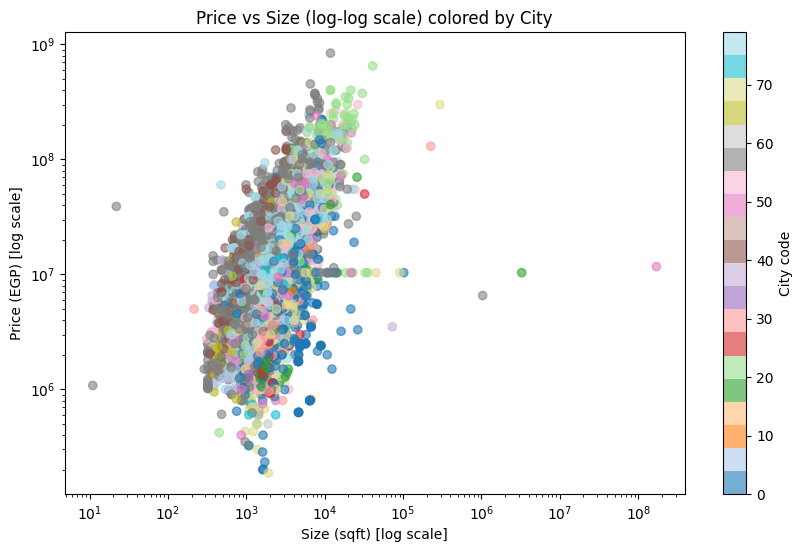

In [112]:

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    df['size_sqft'],
    df['price'],
    c=df['city'].astype('category').cat.codes,  # color by city
    cmap='tab20',
    alpha=0.6
)

plt.xscale('log')  # log scale for size
plt.yscale('log')  # log scale for price
plt.xlabel('Size (sqft) [log scale]')
plt.ylabel('Price (EGP) [log scale]')
plt.title('Price vs Size (log-log scale) colored by City')
plt.colorbar(scatter, label='City code')
plt.show()


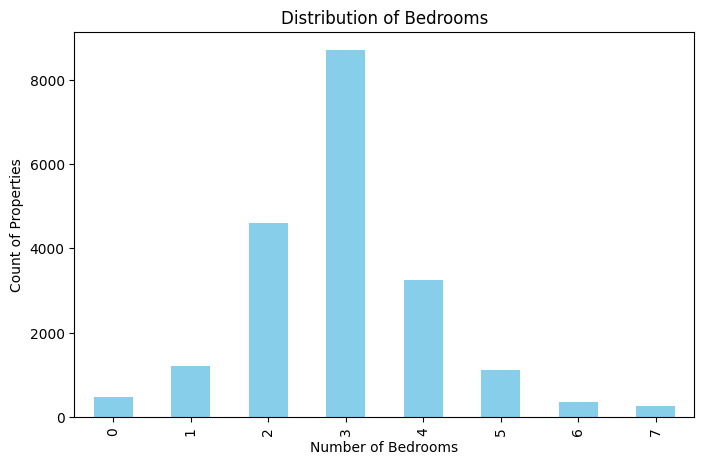

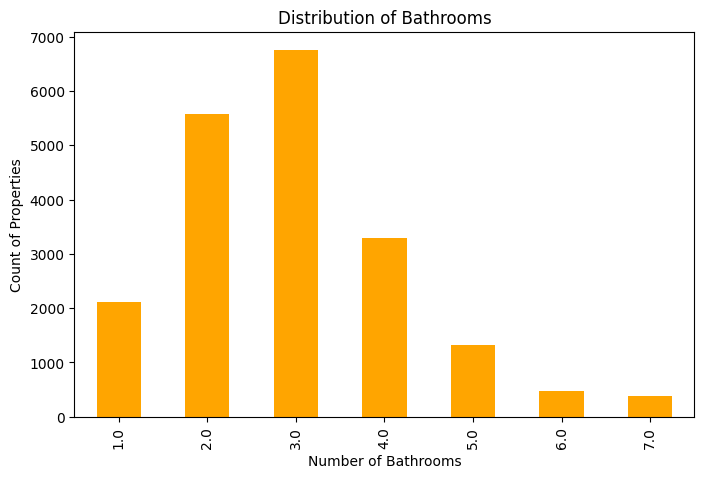

In [113]:
# Bedrooms distribution
df['bedrooms'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), color='skyblue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count of Properties')
plt.title('Distribution of Bedrooms')
plt.show()

# Bathrooms distribution
df['bathrooms'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), color='orange')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count of Properties')
plt.title('Distribution of Bathrooms')
plt.show()


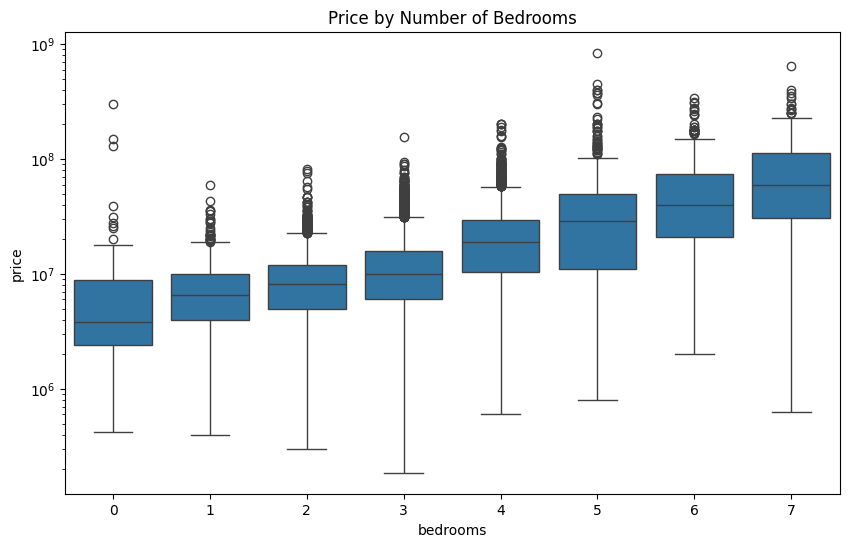

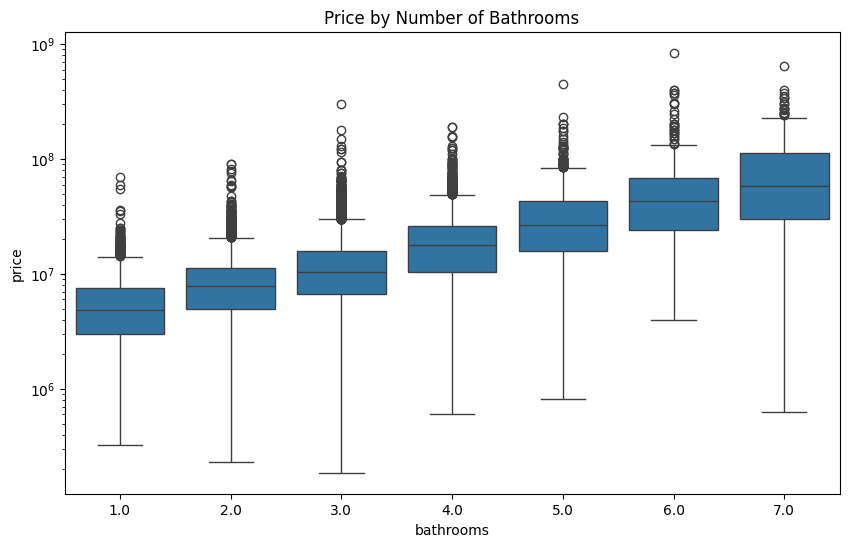

In [114]:
import seaborn as sns

# Boxplot: Price vs Bedrooms
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.yscale('log')  # Use log if prices vary a lot
plt.title('Price by Number of Bedrooms')
plt.show()

# Boxplot: Price vs Bathrooms
plt.figure(figsize=(10,6))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.yscale('log')
plt.title('Price by Number of Bathrooms')
plt.show()


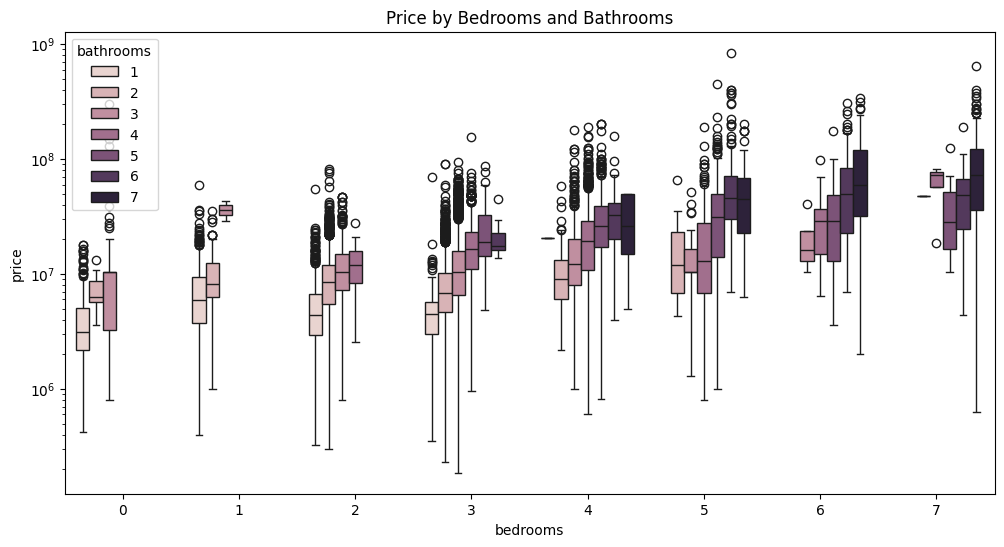

In [115]:
plt.figure(figsize=(12,6))
sns.boxplot(x='bedrooms', y='price', hue='bathrooms', data=df)
plt.yscale('log')
plt.title('Price by Bedrooms and Bathrooms')
plt.show()


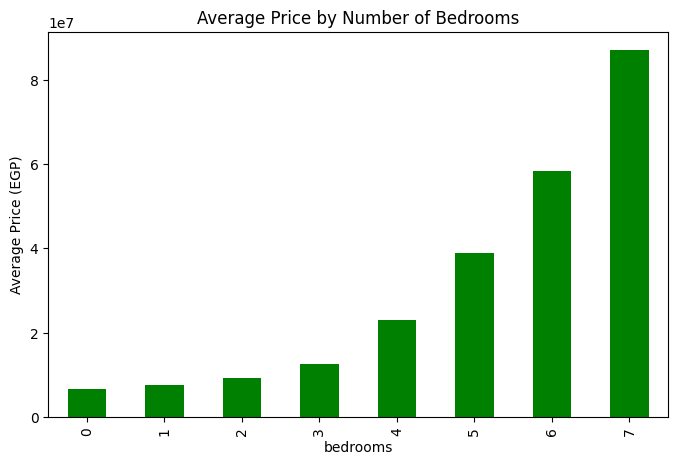

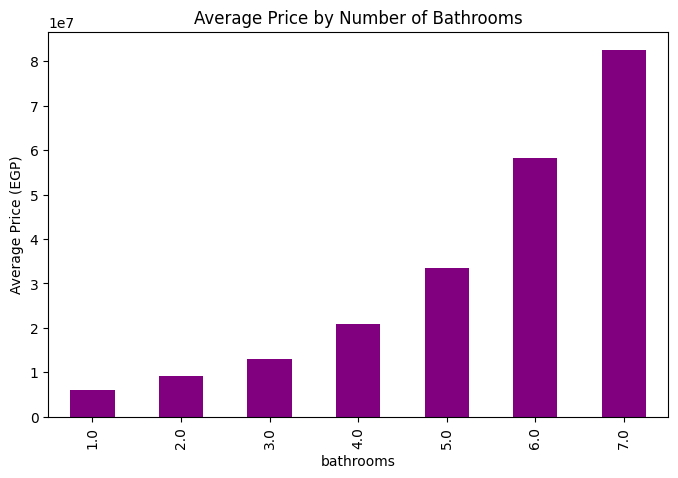

In [116]:
# Average price per bedroom
avg_price_bedrooms = df.groupby('bedrooms')['price'].mean()
avg_price_bedrooms.plot(kind='bar', figsize=(8,5), color='green')
plt.ylabel('Average Price (EGP)')
plt.title('Average Price by Number of Bedrooms')
plt.show()

# Average price per bathroom
avg_price_bathrooms = df.groupby('bathrooms')['price'].mean()
avg_price_bathrooms.plot(kind='bar', figsize=(8,5), color='purple')
plt.ylabel('Average Price (EGP)')
plt.title('Average Price by Number of Bathrooms')
plt.show()


In [117]:
avg_price = df.groupby(['bedrooms','mid_room'])['price'].mean().unstack()
print(avg_price)


mid_room             0             1
bedrooms                            
0         6.701648e+06  6.861851e+06
1         6.784682e+06  9.038921e+06
2         8.142635e+06  1.113326e+07
3         1.020856e+07  1.542087e+07
4         1.990983e+07  2.480616e+07
5         3.210689e+07  4.180324e+07
6         5.427757e+07  5.987417e+07
7         7.582954e+07  9.035037e+07


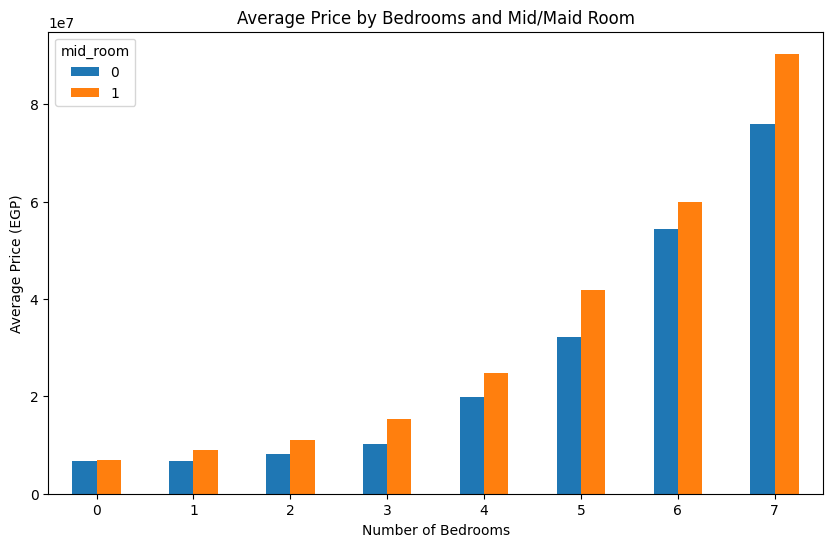

In [118]:
avg_price.plot(kind='bar', figsize=(10,6))
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (EGP)')
plt.title('Average Price by Bedrooms and Mid/Maid Room')
plt.xticks(rotation=0)
plt.show()


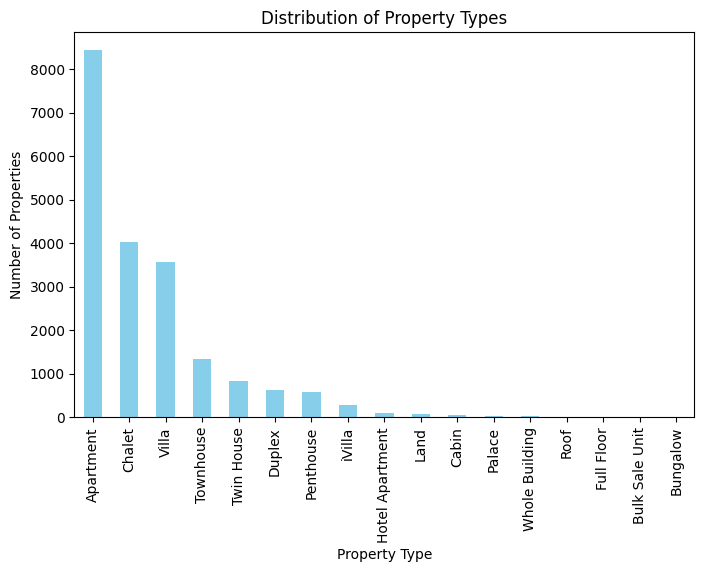

In [119]:
df['type'].value_counts().plot(kind='bar', figsize=(8,5), color='skyblue')
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.title('Distribution of Property Types')
plt.show()


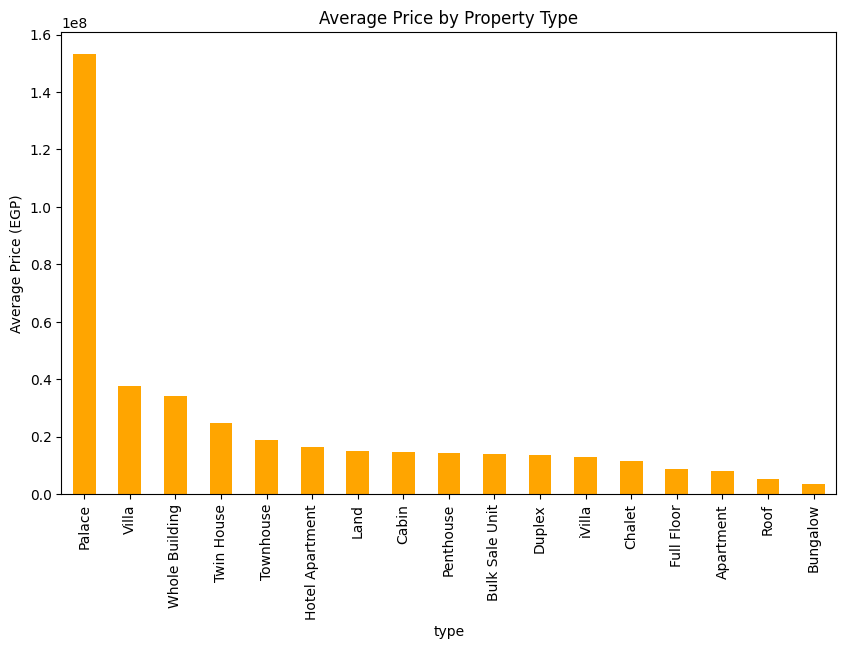

In [120]:
avg_price_type = df.groupby('type')['price'].mean().sort_values(ascending=False)
avg_price_type.plot(kind='bar', figsize=(10,6), color='orange')
plt.ylabel('Average Price (EGP)')
plt.title('Average Price by Property Type')
plt.show()


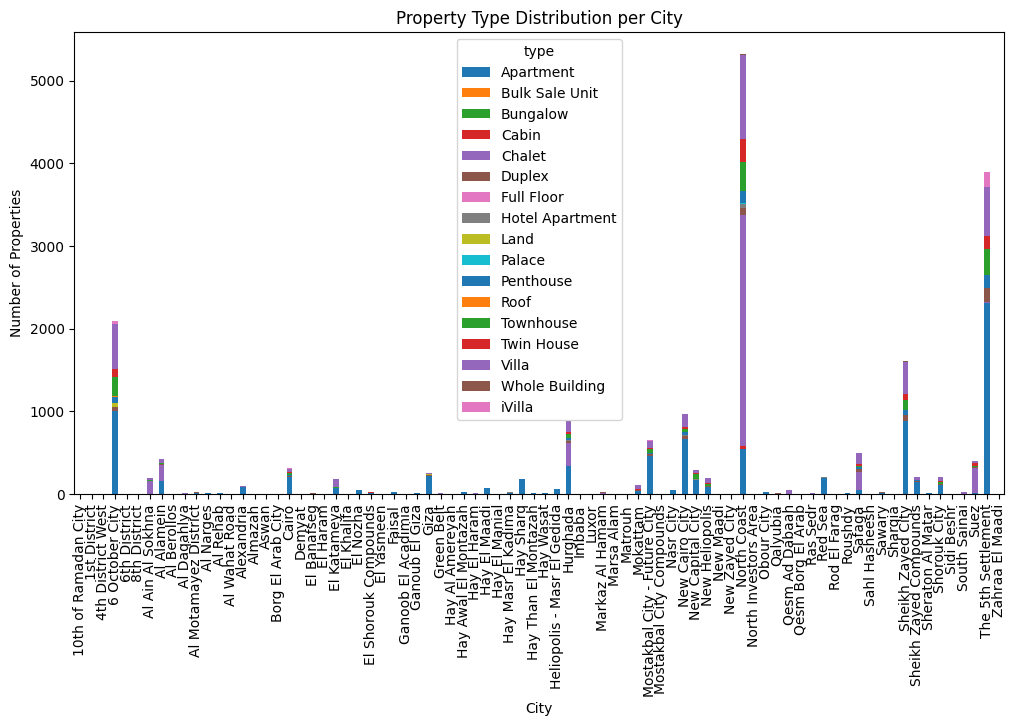

In [121]:
type_location = df.groupby(['city', 'type']).size().unstack(fill_value=0)
type_location.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.title('Property Type Distribution per City')
plt.show()


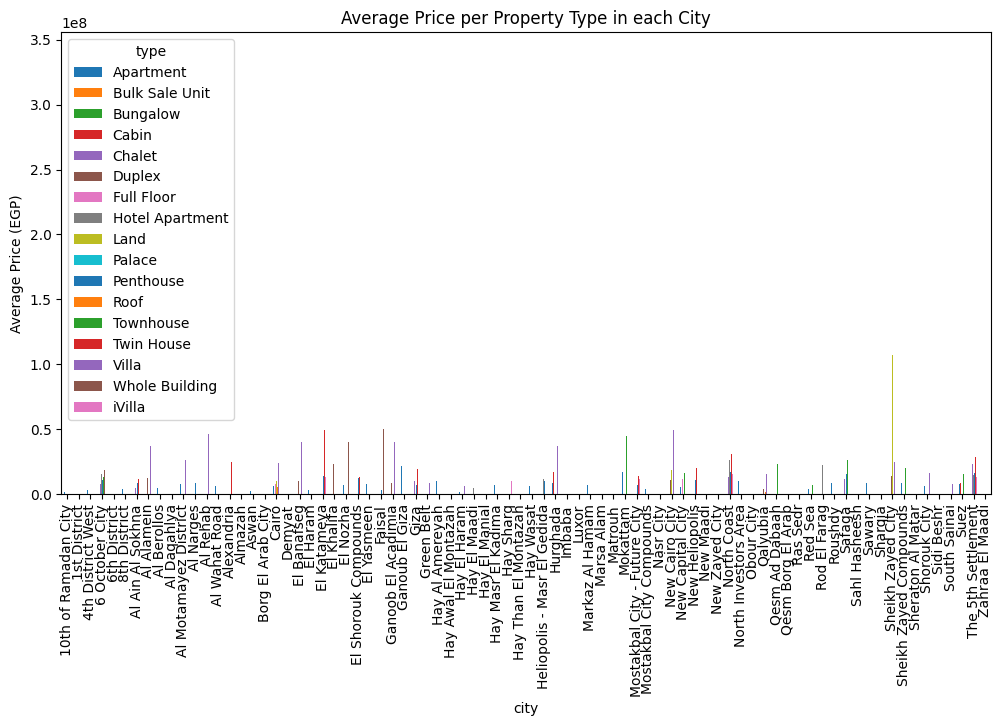

In [122]:
avg_price_type_loc = df.groupby(['city','type'])['price'].mean().unstack()
avg_price_type_loc.plot(kind='bar', figsize=(12,6))
plt.ylabel('Average Price (EGP)')
plt.title('Average Price per Property Type in each City')
plt.show()


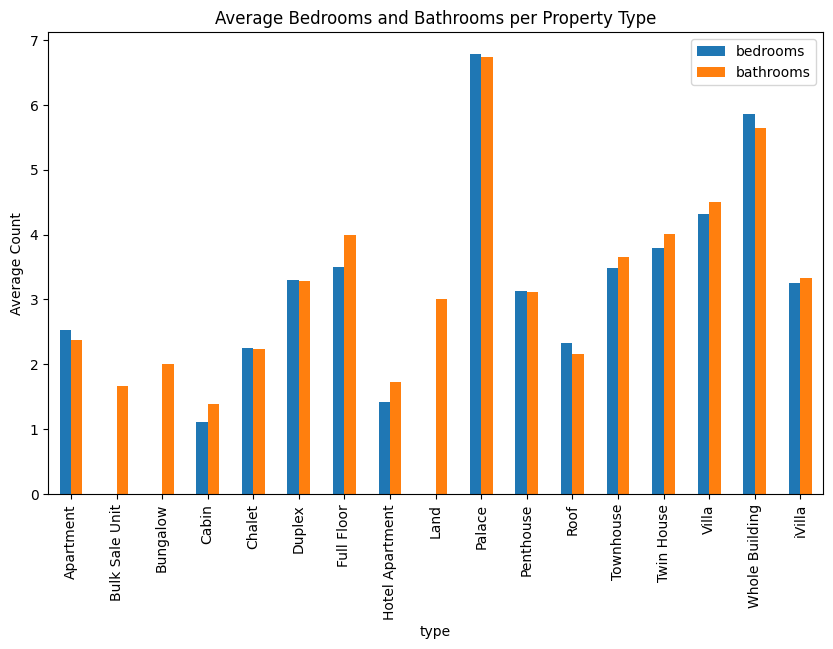

In [123]:
# Group by type and calculate average bedrooms and bathrooms
type_bed_bath = df.groupby('type')[['bedrooms', 'bathrooms']].mean()
type_bed_bath.plot(kind='bar', figsize=(10,6))
plt.ylabel('Average Count')
plt.title('Average Bedrooms and Bathrooms per Property Type')
plt.show()



## Overview

This comprehensive analysis examines the Egyptian real estate market through multiple dimensions including price-size relationships, property characteristics, price efficiency metrics, and property type distributions.

---

## 1. Price and Size Relationship Analysis

### Log-Price vs Log-Size Correlation

The scatter plot analysis reveals a **strong positive correlation** between property size and price on a logarithmic scale:

- **Pattern**: Clear upward trend indicating larger properties command higher prices
- **Distribution**: Majority of properties cluster between:
  - Log(Size): 7.5-10.0 sqft (approximately 1,800-22,000 sqft)
  - Log(Price): 14-19 EGP (approximately 1.2M-180M EGP)
- **Outliers**: Several high-value outliers exist above 20 on the log-price scale (>485M EGP)
- **Density**: Highest concentration in the middle range, suggesting most market activity occurs in mid-sized properties

### Price vs Size (Log-Log Scale) by City

The colored scatter plot shows price-size relationships vary significantly across cities:

- **Wide geographic spread** in pricing patterns
- Different cities occupy distinct price-size zones
- Some cities show tighter clustering (consistent pricing) while others show wider dispersion
- Premium locations maintain higher price-per-square-foot ratios across all property sizes

---

## 2. Price Efficiency Metrics

### Most Expensive Properties per Square Foot

**Top 5 Properties by Price per Sqft:**

| Rank | Price (EGP) | Size (sqft) | Price per Sqft | Location |
|------|-------------|-------------|----------------|----------|
| 1 | 39M | 22 | 1.77M | Madinaty, Cairo |
| 2 | 60M | 474 | 126,582 | Villette, 5th Settlement Compounds, The 5th Se... |
| 3 | 1.08M | 11 | 98,182 | Al Alamein, North Coast |
| 4 | 280M | 3,714 | 75,390 | Hacienda Heneish, Qesm Marsa Matrouh, North Coast |
| 5 | 840M | 11,840 | 70,946 | Marassi, Sidi Abdel Rahman, North Coast |

**Key Insights:**
- Ultra-premium locations (North Coast resorts, New Cairo compounds) dominate
- Extreme outlier: Madinaty property at 1.77M per sqft suggests data quality issue or exceptional circumstance
- Coastal resort properties consistently show high price-per-sqft values

### Most Affordable Properties per Square Foot

**Top 5 Cheapest by Price per Sqft:**

| Rank | Price (EGP) | Size (sqft) | Price per Sqft | Location |
|------|-------------|-------------|----------------|----------|
| 1 | 11.69M | 17,019,563.6 | 0.687 | Sarai, Mostakbal City Compounds, Mostakbal Cit... |
| 2 | 10.35M | 3,255,007.0 | 3.178 | The 6th Settlement, New Cairo City, Cairo |
| 3 | 6.55M | 1,034,476.0 | 6.331 | Mountain View, Ras Al Hekma, North Coast |
| 4 | 3.5M | 72,969.0 | 47.966 | Sidi Gaber St., Sidi Gaber, Hay Sharq, Alexandria |
| 5 | 186,900 | 1,916.0 | 97.547 | Belle Vie, New Zayed City, Sheikh Zayed City, ... |

**Key Insights:**
- Extremely large properties (>1M sqft) show lowest per-sqft prices
- Likely represents land sales or bulk development opportunities
- Traditional residential properties (bottom of list) show more normalized ratios

### Most Expensive Properties per Square Meter

**Top 5 Properties by Price per Sqm:**

| Rank | Price (EGP) | Size (sqm) | Price per Sqm | Location |
|------|-------------|------------|---------------|----------|
| 1 | 39M | 2.0 | 19.5M | Madinaty, Cairo |
| 2 | 60M | 44.0 | 1.36M | Villette, 5th Settlement Compounds, The 5th Se... |
| 3 | 1.08M | 1.0 | 1.08M | Al Alamein, North Coast |
| 4 | 280M | 345.0 | 811,594 | Hacienda Heneish, Qesm Marsa Matrouh, North Coast |
| 5 | 840M | 1,100.0 | 763,636 | Marassi, Sidi Abdel Rahman, North Coast |

**Note**: Converted from sqft analysis showing same properties with different units

### Most Affordable Properties per Square Meter

**Top 5 Cheapest by Price per Sqm:**

| Rank | Price (EGP) | Size (sqm) | Price per Sqm | Location |
|------|-------------|-----------|---------------|----------|
| 1 | 11.69M | 15,811,692.0 | 0.739 | Sarai, Mostakbal City Compounds, Mostakbal Cit... |
| 2 | 10.35M | 302,490.0 | 34.214 | The 6th Settlement, New Cairo City, Cairo |
| 3 | 6.55M | 96,106.0 | 68.154 | Mountain View, Ras Al Hekma, North Coast |
| 4 | 3.5M | 6,779.0 | 516.300 | Sidi Gaber St., Sidi Gaber, Hay Sharq, Alexandria |
| 5 | 186,900 | 178.0 | 1,050.000 | Belle Vie, New Zayed City, Sheikh Zayed City, ... |

---

## 3. Property Characteristics Distribution

### Bedroom Distribution

**Key Statistics:**
- **Most common**: 3 bedrooms (~8,600 properties)
- **Second most common**: 2 bedrooms (~4,600 properties)
- **Third most common**: 4 bedrooms (~3,100 properties)

**Distribution Pattern:**
- Strong concentration in 2-4 bedroom range (family-sized units)
- Decreasing frequency as bedroom count increases
- Studio/0-bedroom properties relatively rare (~500 units)
- 5+ bedroom properties represent luxury/villa segment (decreasing frequency)

### Bathroom Distribution

**Key Statistics:**
- **Peak**: 3 bathrooms (~6,900 properties)
- **Second peak**: 2 bathrooms (~5,600 properties)
- **Third**: 4 bathrooms (~3,300 properties)

**Distribution Pattern:**
- More normal distribution compared to bedrooms
- Typical ratio: slightly fewer bathrooms than bedrooms
- 5+ bathrooms indicate luxury properties

### Price vs Bedrooms Relationship

**Boxplot Analysis reveals:**

- **Clear positive correlation**: More bedrooms = higher median price
- **Price ranges by bedroom count:**
  - 0 bedrooms: Median ~2M EGP
  - 1 bedroom: Median ~5M EGP
  - 2 bedrooms: Median ~8M EGP
  - 3 bedrooms: Median ~15M EGP
  - 4 bedrooms: Median ~30M EGP
  - 5 bedrooms: Median ~40M EGP
  - 6 bedrooms: Median ~60M EGP
  - 7 bedrooms: Median ~80M EGP

**Variability Patterns:**
- Increasing price variance with bedroom count
- Numerous high-value outliers across all categories
- 4-7 bedroom properties show widest price ranges (indicating diverse luxury market)

### Price vs Bathrooms Relationship

**Similar pattern to bedrooms:**

- **Linear price increase** with bathroom count
- **Median prices:**
  - 1 bathroom: ~5M EGP
  - 2 bathrooms: ~10M EGP
  - 3 bathrooms: ~15M EGP
  - 4 bathrooms: ~20M EGP
  - 5 bathrooms: ~40M EGP
  - 6 bathrooms: ~60M EGP
  - 7 bathrooms: ~80M EGP

**Key Insights:**
- Bathroom count is strong price predictor
- High correlation with bedroom count (as expected)
- Premium properties (5+ bathrooms) show significant price premiums

### Combined Bedroom-Bathroom Price Analysis

**Grouped boxplot shows:**

- Properties with more bathrooms than bedrooms generally command **price premiums**
- For each bedroom count, adding bathrooms increases median price
- Bathrooms appear to be luxury indicators
- 7-bathroom properties (across bedroom counts) reach highest price ranges

### Average Price by Bedroom Count

**Bar chart analysis:**
- **Exponential growth pattern** in average prices
- 0 bedrooms: ~5M EGP average
- 7 bedrooms: ~90M EGP average
- Steep increase between 3-7 bedrooms indicates luxury segment premium

### Average Price by Bathroom Count

**Similar exponential pattern:**
- 1 bathroom: ~6M EGP average
- 7 bathrooms: ~82M EGP average
- Closely mirrors bedroom pricing pattern

### Average Price by Bedrooms with Maid Room

**Comparison reveals:**
- Properties **with maid rooms** command 10-30% premium across all bedroom counts
- Premium increases with property size
- Maid room is strong luxury/premium indicator
- Most pronounced difference in 5-7 bedroom properties

---

## 4. Property Type Analysis

### Overall Property Type Distribution

**Market composition:**

1. **Apartment**: ~8,700 properties (dominant category)
2. **Chalet**: ~4,100 properties (strong coastal market)
3. **Villa**: ~3,700 properties (luxury segment)
4. **Townhouse**: ~1,400 properties
5. **Twin House**: ~900 properties
6. **Duplex**: ~700 properties
7. **Penthouse**: ~600 properties
8. **Milla**: ~350 properties
9. Other types: <300 properties each

**Key Insights:**
- Apartments dominate market supply
- Strong coastal/resort market (chalets)
- Substantial luxury villa inventory
- Diverse property type offerings

### Average Price by Property Type

**Price hierarchy:**

1. **Palace**: ~155M EGP (ultra-luxury outlier)
2. **Villa**: ~37M EGP
3. **Whole Building**: ~35M EGP
4. **Town House**: ~25M EGP
5. **Townhouse**: ~20M EGP
6. **Hotel Apartment**: ~18M EGP
7. **Land**: ~15M EGP
8. **Cabin**: ~15M EGP
9. **Penthouse**: ~14M EGP
10. **Bulk Sale Unit**: ~13M EGP
11. **Duplex**: ~13M EGP
12. **Chalet**: ~12M EGP
13. **Milla**: ~12M EGP
14. **Full Floor**: ~10M EGP
15. **Apartment**: ~8M EGP
16. **Roof**: ~6M EGP
17. **Bungalow**: ~5M EGP

**Market Segmentation:**
- Clear luxury tier (Palace, Villa, Whole Building): >30M EGP
- Upper-mid tier (Townhouse, Hotel Apt, Land): 15-25M EGP
- Standard tier (Chalet, Duplex, Apartment): 8-15M EGP
- Budget tier (Roof, Bungalow): <10M EGP

### Property Type Distribution by City

**Stacked bar chart reveals:**

- **Cairo-based cities**: Heavily apartment-focused with villa component
- **North Coast cities**: Dominated by chalets (resort properties)
- **New developments**: Mixed-use with diverse property types
- **Established cities**: More apartment-concentrated
- **Luxury compounds**: Higher proportion of villas and townhouses

### Average Price per Property Type in Each City

**City-specific insights:**

- **Highest variations** in villa and palace categories across cities
- Coastal cities show elevated chalet prices
- Cairo neighborhoods show premium apartment pricing
- New Cairo/Sheikh Zayed areas command premium for townhouses
- Resort areas (North Coast) show highest chalet averages

### Average Bedrooms and Bathrooms per Property Type

**Property type characteristics:**

1. **Palace**: 6.8 bedrooms, 6.8 bathrooms (luxury standard)
2. **Whole Building**: 5.8 bedrooms, 5.8 bathrooms
3. **Villa**: 4.5 bedrooms, 4.3 bathrooms
4. **Twin House**: 4.0 bedrooms, 4.0 bathrooms
5. **Townhouse**: 3.5 bedrooms, 3.6 bathrooms
6. **Duplex**: 3.2 bedrooms, 4.0 bathrooms
7. **Chalet**: 2.2 bedrooms, 2.2 bathrooms
8. **Apartment**: 2.5 bedrooms, 2.3 bathrooms
9. **Penthouse**: 3.1 bedrooms, 3.0 bathrooms

**Key Patterns:**
- Luxury property types (Palace, Villa) have 5+ bedrooms
- Family units (Townhouse, Duplex) average 3-4 bedrooms
- Compact types (Chalet, Apartment) average 2-3 bedrooms
- Bathroom count closely tracks bedroom count
- Duplexes show higher bathroom-to-bedroom ratio

---

## 5. Market Insights and Conclusions

### Supply-Side Characteristics

1. **Market Maturity**: Diverse property type offering indicates developed market
2. **Apartment Dominance**: Urban living preference/availability
3. **Resort Segment**: Strong coastal/leisure property market
4. **Luxury Supply**: Substantial high-end inventory (villas, palaces)

### Price-Size Dynamics

1. **Strong Correlation**: Size is primary price determinant
2. **Market Efficiency**: Logarithmic relationship suggests efficient pricing
3. **Premium Locations**: Command consistent size-adjusted premiums
4. **Outliers Present**: Some pricing anomalies require data validation

### Property Features Impact

1. **Bedroom Count**: Strong positive correlation with price
2. **Bathroom Count**: Equally strong indicator of property value
3. **Maid Room**: Significant premium indicator (luxury market)
4. **Feature Premiums**: Additional amenities command measurable price increases

### Geographic Segmentation

1. **Cairo Premium**: Established neighborhoods command highest apartments prices
2. **Resort Premium**: North Coast chalets show elevated pricing
3. **New Development**: Modern compounds (New Cairo, Sheikh Zayed) show premium pricing
4. **Market Diversity**: Different cities serve different market segments

### Investment Insights

1. **Value Opportunities**: Properties with extreme size may offer per-sqft value
2. **Luxury Market**: Strong high-end segment with significant inventory
3. **Type Arbitrage**: Pricing varies significantly by property type within same location
4. **Feature Premium**: Additional bedrooms/bathrooms show diminishing returns at higher counts

---

## Data Quality Notes

- Some extreme outliers may indicate data entry errors (e.g., Madinaty 39M for 22 sqft)
- Very large size entries (>1M sqft) likely represent land/bulk sales
- Price-per-sqft extremes should be validated before analysis use
- Location standardization needed for some entries

---



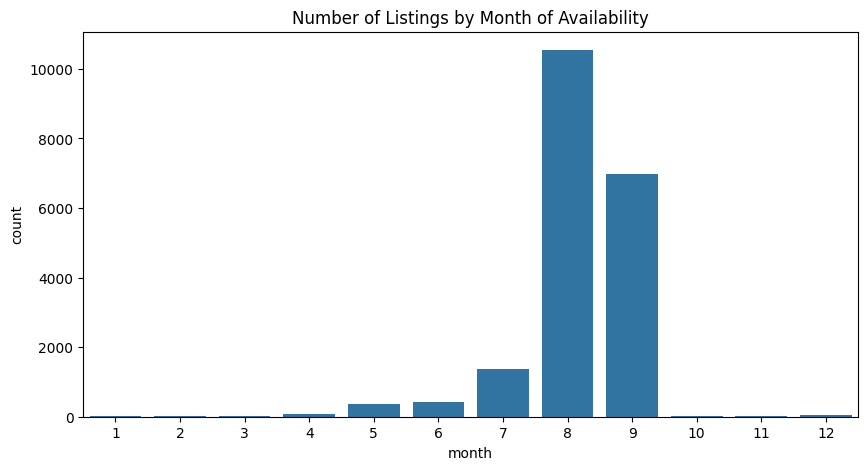

In [124]:
df['available_from'] = pd.to_datetime(df['available_from'], errors='coerce')
df['month'] = df['available_from'].dt.month

plt.figure(figsize=(10,5))
sns.countplot(x='month', data=df)
plt.title('Number of Listings by Month of Availability')
plt.show()


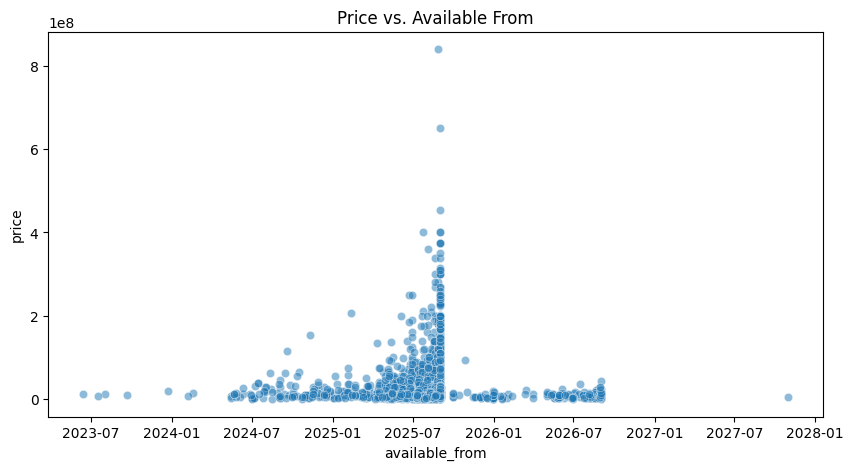

In [125]:
#Price Trends Over Time
plt.figure(figsize=(10,5))
sns.scatterplot(x='available_from', y='price', data=df, alpha=0.5)
plt.title('Price vs. Available From')
plt.show()


## Recommended Further Analysis

1. Time-series analysis of price trends
2. Neighborhood-specific micro-market analysis
3. Amenity impact quantification
4. Price prediction modeling
5. Market segment identification (clustering)
7. Seasonal variation analysis (particularly for resort properties)

In [126]:
df.columns

Index(['url', 'price', 'description', 'location', 'type', 'size', 'bedrooms',
       'bathrooms', 'available_from', 'payment_method', 'down_payment',
       'size_sqft', 'unit_sqft', 'size_sqm', 'unit_sqm', 'mid_room',
       'compound', 'district', 'city', 'governorate', 'price_per_sqm',
       'price_per_sqft', 'month'],
      dtype='object')

In [127]:
from sklearn.preprocessing import LabelEncoder

df['city_encoded'] = LabelEncoder().fit_transform(df['city'].astype(str))
df["compound_encoded"] = LabelEncoder().fit_transform(df['compound'].astype(str))
df_compound = df.groupby('compound')[['price', 'price_per_sqft', 'bedrooms', 'bathrooms', 'size_sqft', 'size_sqm']].mean()


In [128]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_compound)

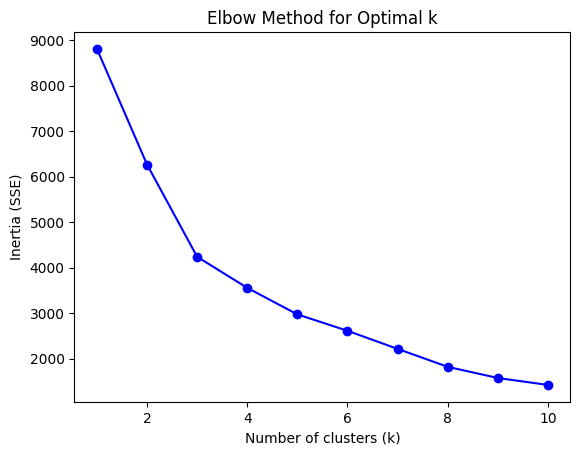

In [129]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [130]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_compound['compund_segment'] = kmeans.fit_predict(X_scaled)


In [131]:
df_compound_reset = df_compound.reset_index()
print(df_compound_reset)

                  compound         price  price_per_sqft  bedrooms  bathrooms  \
0            10th District  7.750000e+06     2796.228553  3.000000   3.500000   
1              10th Sector  3.500000e+06     2098.321343  3.000000   2.000000   
2     10th of Ramadan City  1.500000e+06      871.080139  3.000000   2.000000   
3            11th District  1.391667e+07     3208.991330  4.000000   3.333333   
4            13th District  7.500000e+06     2787.068004  4.000000   2.000000   
...                    ...           ...             ...       ...        ...   
1463            Zomra East  1.290000e+07     7700.309716  2.250000   2.375000   
1464                  Zoya  3.602288e+07    15319.866438  3.041667   3.291667   
1465              il Bayou  1.374108e+07     7220.132381  4.333333   2.666667   
1466        katameya coast  1.065000e+08    18048.258711  5.750000   6.000000   
1467          بوابة النعيم  5.700000e+06     2161.547213  3.000000   3.000000   

        size_sqft    size_s

In [138]:
cluster_summary = df_compound.groupby('compund_segment')[['price', 'price_per_sqft', 'size_sqft', 'size_sqm','bedrooms','bathrooms']].mean()
cluster_summary

,price,price_per_sqft,size_sqft,size_sqm,bedrooms,bathrooms
compund_segment,,,,,,
0,8.775326e+06,3808.502744,3.203632e+03,297.625773,3.183060,2.787590
1,7.972775e+06,3061.698464,1.627961e+06,151242.500000,0.500000,2.000000
2,3.896554e+07,8505.472608,5.636437e+03,523.638883,4.599921,4.738436
3,6.613596e+06,5410.754561,1.394038e+03,129.510081,1.940020,1.656772


In [139]:
print(df_compound.columns)


Index(['price', 'price_per_sqft', 'bedrooms', 'bathrooms', 'size_sqft',
       'size_sqm', 'compund_segment'],
      dtype='object')


In [141]:
df_compound_reset['log_price'] = np.log(df_compound_reset['price'])
df_compound_reset['log_size'] = np.log(df_compound_reset['size_sqm'])


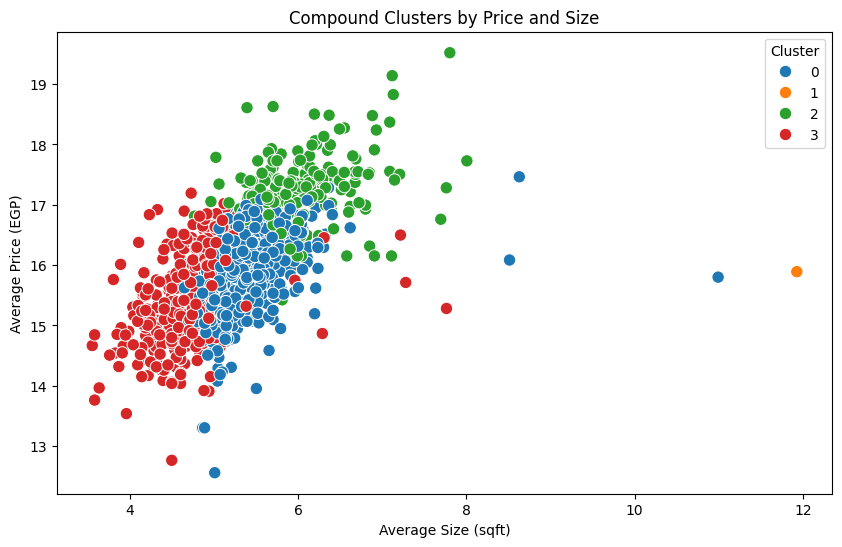

In [142]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_compound_reset,
    x='log_size',
    y='log_price',
    hue='compund_segment',
    palette='tab10',
    s=80
)
plt.title('Compound Clusters by Price and Size')
plt.xlabel('Average Size (sqft)')
plt.ylabel('Average Price (EGP)')
plt.legend(title='Cluster')
plt.show()

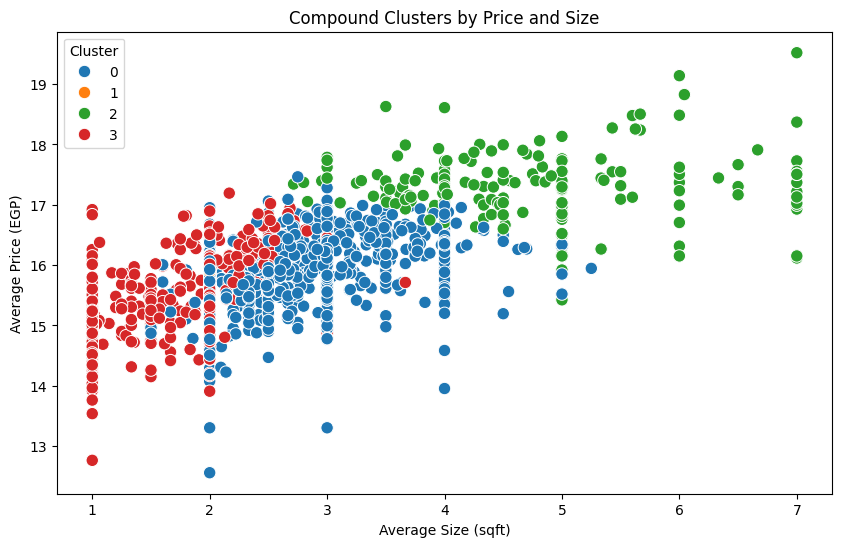

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_compound_reset,
    x='bathrooms',
    y='log_price',
    hue='compund_segment',
    palette='tab10',
    s=80
)
plt.title('Compound Clusters by Price and Size')
plt.xlabel('bathrooms')
plt.ylabel('Average Price (EGP)')
plt.legend(title='Cluster')
plt.show()

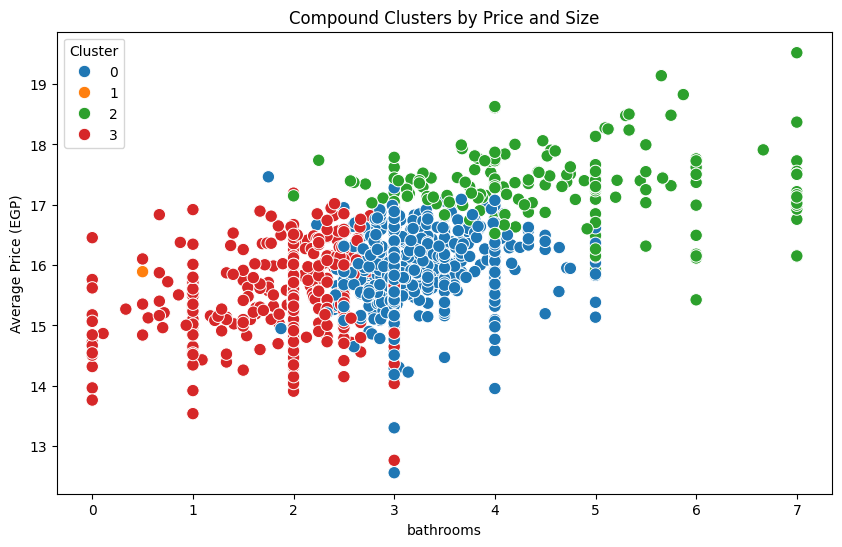

In [148]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_compound_reset,
    x='bedrooms',
    y='log_price',
    hue='compund_segment',
    palette='tab10',
    s=80
)
plt.title('Compound Clusters by Price and Size')
plt.xlabel('bathrooms')
plt.ylabel('Average Price (EGP)')
plt.legend(title='Cluster')
plt.show()